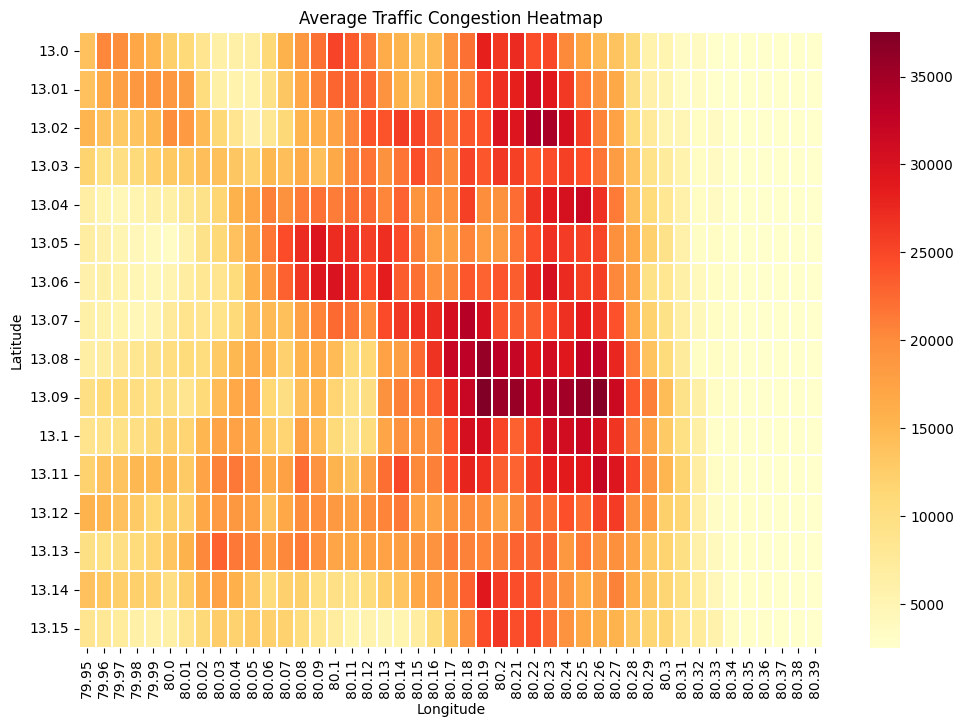

In [33]:

pivot_table = df.pivot_table(
    index='Latitude', 
    columns='Longitude', 
    values='CongestionScore', 
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', linewidths=0.1)
plt.title("Average Traffic Congestion Heatmap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig("congestion_heatmap.png")
plt.show()


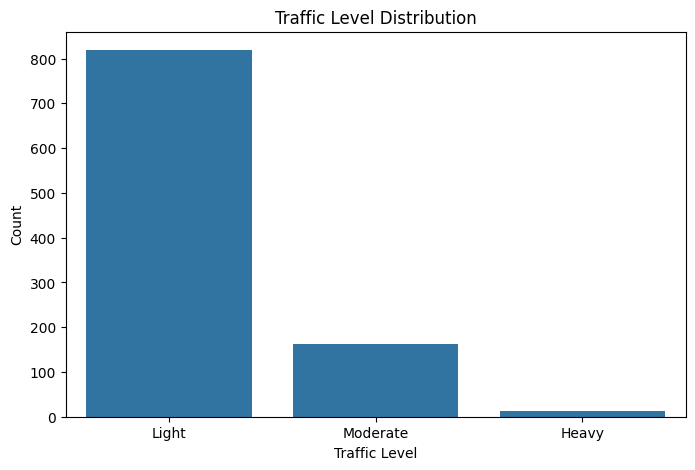

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='TrafficLevel', order=['Light', 'Moderate', 'Heavy'])
plt.title("Traffic Level Distribution")
plt.xlabel("Traffic Level")
plt.ylabel("Count")
plt.savefig("traffic_level_distribution.png")
plt.show()


In [29]:
df['CongestionScore'] = df['RedPixels'] * 3 + df['OrangePixels'] * 2 + df['GreenPixels']
df['CongestionLevel'] = pd.qcut(df['CongestionScore'], q=3, labels=['Light', 'Moderate', 'Heavy'])
print(df['CongestionLevel'].head(20))

0     Moderate
1        Heavy
2        Heavy
3     Moderate
4     Moderate
5     Moderate
6     Moderate
7        Light
8        Light
9        Light
10       Light
11    Moderate
12    Moderate
13    Moderate
14       Heavy
15       Heavy
16       Heavy
17       Heavy
18    Moderate
19    Moderate
Name: CongestionLevel, dtype: category
Categories (3, object): ['Light' < 'Moderate' < 'Heavy']


In [23]:
red_thresh = df['RedRatio'].quantile(0.75)
orange_thresh = df['OrangeRatio'].quantile(0.75)

def label_traffic(row):
    if row['RedRatio'] > red_thresh:
        return 'Heavy'
    elif row['OrangeRatio'] > orange_thresh:
        return 'Moderate'
    else:
        return 'Light'
print(df['TrafficLevel'].tail(10))


984       Light
985       Light
986       Light
987       Light
988       Light
989    Moderate
990    Moderate
991    Moderate
992    Moderate
993    Moderate
Name: TrafficLevel, dtype: object


In [18]:
print(df[['RedRatio', 'OrangeRatio', 'GreenRatio']].head(20))


    RedRatio  OrangeRatio  GreenRatio
0   0.028231     0.067640    0.904129
1   0.018637     0.056666    0.924697
2   0.019124     0.068152    0.912724
3   0.023417     0.091088    0.885495
4   0.034120     0.140089    0.825790
5   0.033571     0.127725    0.838703
6   0.031583     0.105630    0.862787
7   0.041771     0.131461    0.826767
8   0.059848     0.145316    0.794836
9   0.062422     0.151983    0.785595
10  0.057007     0.134032    0.808961
11  0.030278     0.071190    0.898532
12  0.022244     0.052925    0.924831
13  0.016852     0.046272    0.936877
14  0.014832     0.045340    0.939828
15  0.013074     0.067909    0.919017
16  0.014989     0.075698    0.909314
17  0.016651     0.081181    0.902168
18  0.024595     0.096982    0.878424
19  0.025332     0.097838    0.876829


In [17]:
def label_traffic(row):
    if row['RedRatio'] > 0.4:
        return 'Heavy'
    elif row['OrangeRatio'] > 0.4:
        return 'Moderate'
    else:
        return 'Light'

df['TrafficLevel'] = df.apply(label_traffic, axis=1)
print(df['TrafficLevel'].head(100))


0     Light
1     Light
2     Light
3     Light
4     Light
      ...  
95    Light
96    Light
97    Light
98    Light
99    Light
Name: TrafficLevel, Length: 100, dtype: object


In [11]:
df['TotalPixels'] = df[['RedPixels', 'OrangePixels', 'GreenPixels']].sum(axis=1)
df['RedRatio'] = df['RedPixels'] / df['TotalPixels']
df['OrangeRatio'] = df['OrangePixels'] / df['TotalPixels']
df['GreenRatio'] = df['GreenPixels'] / df['TotalPixels']
print(df.head())

            Timestamp  Latitude  Longitude  RedPixels  OrangePixels  \
0 2025-06-11 12:04:23      13.0      79.95        346           829   
1 2025-06-11 12:04:23      13.0      79.96        346          1052   
2 2025-06-11 12:04:23      13.0      79.97        346          1233   
3 2025-06-11 12:04:23      13.0      79.98        381          1482   
4 2025-06-11 12:04:23      13.0      79.99        435          1786   

   GreenPixels  Hour  Day  Weekday  Month  CongestionScore  TotalPixels  \
0        11081    12   11        2      6            13777        12256   
1        17167    12   11        2      6            20309        18565   
2        16513    12   11        2      6            20017        18092   
3        14407    12   11        2      6            18514        16270   
4        10528    12   11        2      6            15405        12749   

   RedRatio  OrangeRatio  GreenRatio  
0  0.028231     0.067640    0.904129  
1  0.018637     0.056666    0.924697  
2  0.

In [10]:
df['CongestionScore'] = df['RedPixels'] * 3 + df['OrangePixels'] * 2 + df['GreenPixels']
print(df.head(10))

            Timestamp  Latitude  Longitude  RedPixels  OrangePixels  \
0 2025-06-11 12:04:23      13.0      79.95        346           829   
1 2025-06-11 12:04:23      13.0      79.96        346          1052   
2 2025-06-11 12:04:23      13.0      79.97        346          1233   
3 2025-06-11 12:04:23      13.0      79.98        381          1482   
4 2025-06-11 12:04:23      13.0      79.99        435          1786   
5 2025-06-11 12:04:23      13.0      80.00        348          1324   
6 2025-06-11 12:04:23      13.0      80.01        299          1000   
7 2025-06-11 12:04:23      13.0      80.02        299           941   
8 2025-06-11 12:04:23      13.0      80.03        299           726   
9 2025-06-11 12:04:23      13.0      80.04        299           728   

   GreenPixels  Hour  Day  Weekday  Month  CongestionScore  
0        11081    12   11        2      6            13777  
1        17167    12   11        2      6            20309  
2        16513    12   11        2 

In [8]:
df['Timestamp'] = df['Timestamp'].astype(str)
df['Timestamp'] = pd.to_datetime(
    df['Timestamp'].str.replace(r'(\d{2})-(\d{2})-(\d{2})$', r'\1:\2:\3', regex=True)
)
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Weekday'] = df['Timestamp'].dt.weekday
df['Month'] = df['Timestamp'].dt.month
print(df.head())

            Timestamp  Latitude  Longitude  RedPixels  OrangePixels  \
0 2025-06-11 12:04:23      13.0      79.95        346           829   
1 2025-06-11 12:04:23      13.0      79.96        346          1052   
2 2025-06-11 12:04:23      13.0      79.97        346          1233   
3 2025-06-11 12:04:23      13.0      79.98        381          1482   
4 2025-06-11 12:04:23      13.0      79.99        435          1786   

   GreenPixels  Hour  Day  Weekday  Month  
0        11081    12   11        2      6  
1        17167    12   11        2      6  
2        16513    12   11        2      6  
3        14407    12   11        2      6  
4        10528    12   11        2      6  


In [3]:
import pandas as pd
csv_file= 'traffic_data.csv'
df = pd.read_csv(csv_file)
print(df.head()) 


             Timestamp  Latitude  Longitude  RedPixels  OrangePixels  \
0  2025-06-11 12-04-23      13.0      79.95        346           829   
1  2025-06-11 12-04-23      13.0      79.96        346          1052   
2  2025-06-11 12-04-23      13.0      79.97        346          1233   
3  2025-06-11 12-04-23      13.0      79.98        381          1482   
4  2025-06-11 12-04-23      13.0      79.99        435          1786   

   GreenPixels  
0        11081  
1        17167  
2        16513  
3        14407  
4        10528  
